## Environment Setup
You need to have following utilities and packages installed for this to work 
- xxd
- pandas
- numpy
- matplotlib
- tensorfloe

## Graph Data

We will first grap the data to have visual understanding of the Data , make sure that the `flex.csv` and `punch.csv` are in the same directory.

Flex Data


/tmp/ipykernel_22795/455121432.py:12: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "g." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['aX'], 'g.', label='x', linestyle='solid', marker=',')
/tmp/ipykernel_22795/455121432.py:13: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['aY'], 'b.', label='y', linestyle='solid', marker=',')
/tmp/ipykernel_22795/455121432.py:14: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['aZ'], 'r.', label='z', linestyle='solid', marker=',')


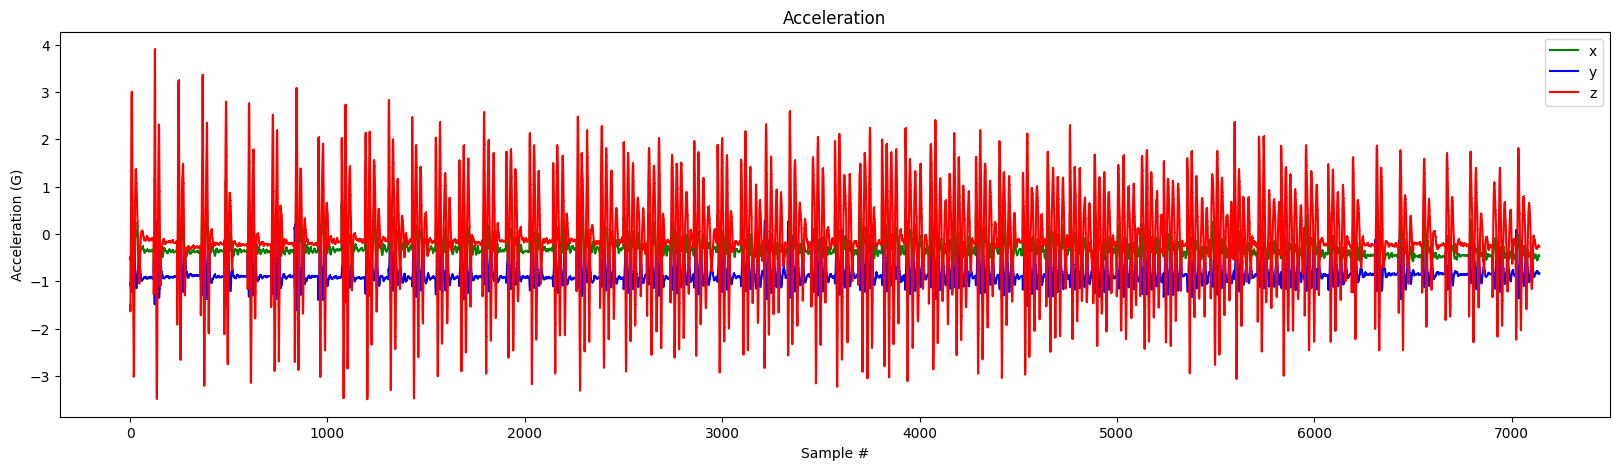

/tmp/ipykernel_22795/455121432.py:21: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "g." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['gX'], 'g.', label='x', linestyle='solid', marker=',')
/tmp/ipykernel_22795/455121432.py:22: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['gY'], 'b.', label='y', linestyle='solid', marker=',')
/tmp/ipykernel_22795/455121432.py:23: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['gZ'], 'r.', label='z', linestyle='solid', marker=',')


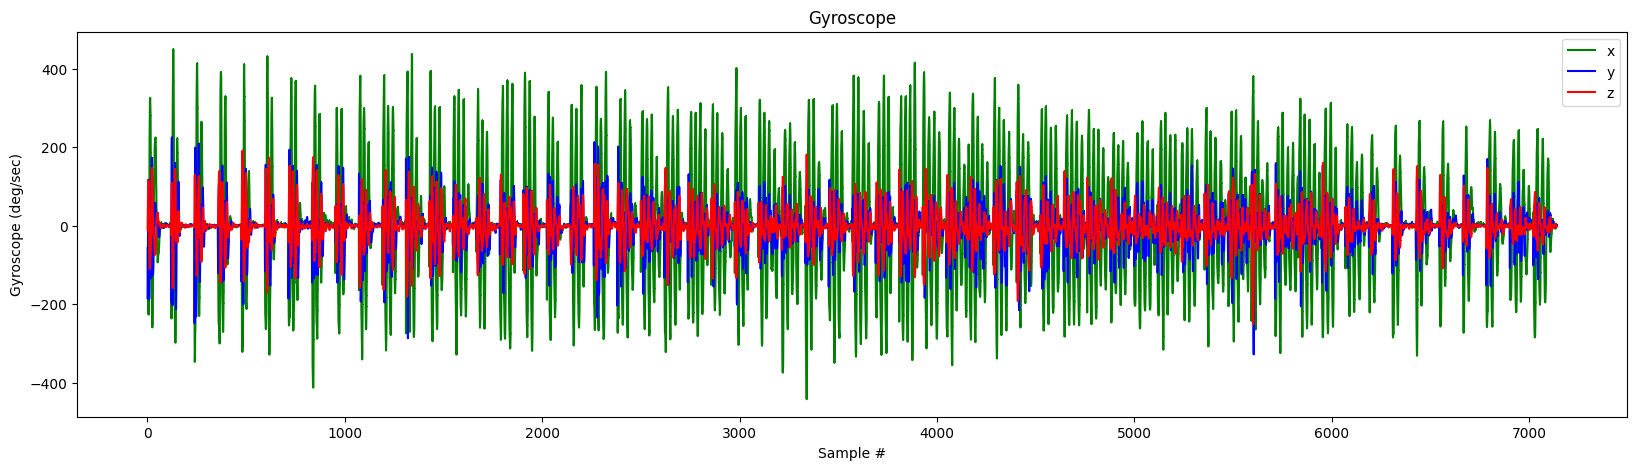

/tmp/ipykernel_22795/455121432.py:12: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "g." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['aX'], 'g.', label='x', linestyle='solid', marker=',')
/tmp/ipykernel_22795/455121432.py:13: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['aY'], 'b.', label='y', linestyle='solid', marker=',')
/tmp/ipykernel_22795/455121432.py:14: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['aZ'], 'r.', label='z', linestyle='solid', marker=',')


Punch Data


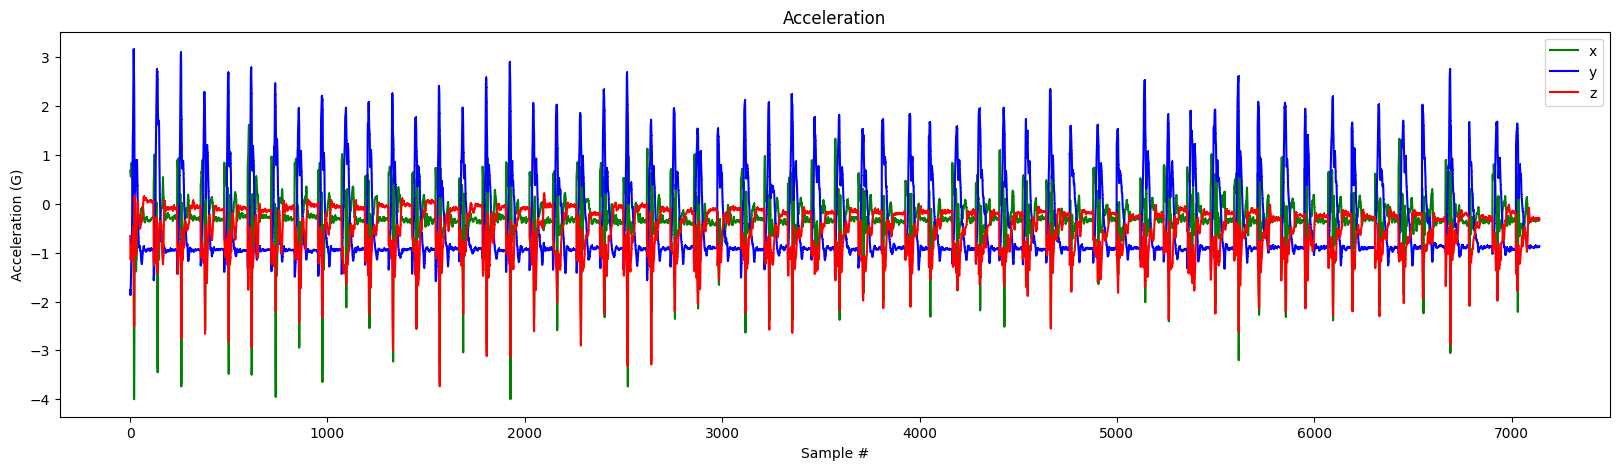

/tmp/ipykernel_22795/455121432.py:21: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "g." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['gX'], 'g.', label='x', linestyle='solid', marker=',')
/tmp/ipykernel_22795/455121432.py:22: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['gY'], 'b.', label='y', linestyle='solid', marker=',')
/tmp/ipykernel_22795/455121432.py:23: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['gZ'], 'r.', label='z', linestyle='solid', marker=',')


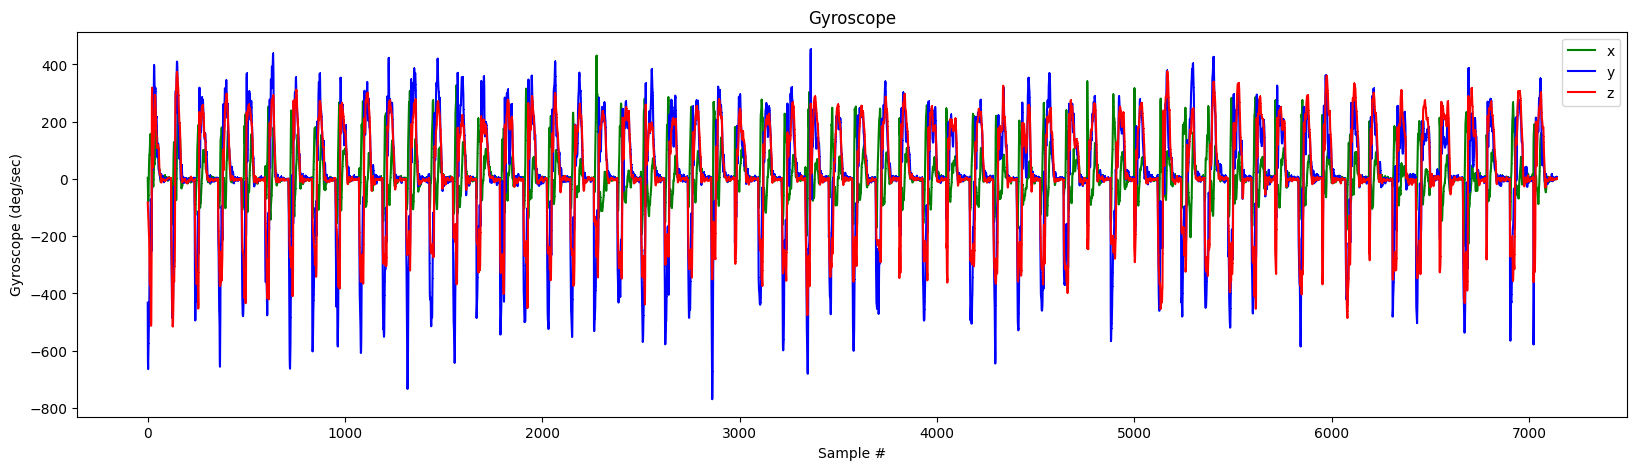

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def data_plot(filename):
    df = pd.read_csv(filename)
    
    index = range(1, len(df['aX']) + 1)
    
    plt.rcParams["figure.figsize"] = (20,5)
    
    plt.plot(index, df['aX'], 'g.', label='x', linestyle='solid', marker=',')
    plt.plot(index, df['aY'], 'b.', label='y', linestyle='solid', marker=',')
    plt.plot(index, df['aZ'], 'r.', label='z', linestyle='solid', marker=',')
    plt.title("Acceleration")
    plt.xlabel("Sample #")
    plt.ylabel("Acceleration (G)")
    plt.legend()
    plt.show()
    
    plt.plot(index, df['gX'], 'g.', label='x', linestyle='solid', marker=',')
    plt.plot(index, df['gY'], 'b.', label='y', linestyle='solid', marker=',')
    plt.plot(index, df['gZ'], 'r.', label='z', linestyle='solid', marker=',')
    plt.title("Gyroscope")
    plt.xlabel("Sample #")
    plt.ylabel("Gyroscope (deg/sec)")
    plt.legend()
    plt.show()

print('Flex Data')
print('========================================')
data_plot('flex.csv')
print('Punch Data')
print('========================================')
data_plot('punch.csv')

# Train Neural Network





## Parse and prepare the data

The next cell parses the csv files and transforms them to a format that will be used to train the fully connected neural network.

Update the `GESTURES` list with the gesture data you've collected in `.csv` format.


In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

print(f"TensorFlow version = {tf.__version__}\n")

# Set a fixed random seed value, for reproducibility, this will allow us to get
# the same random numbers each time the notebook is run
SEED = 1337
np.random.seed(SEED)
tf.random.set_seed(SEED)

# the list of gestures that data is available for
GESTURES = [
    "punch",
    "flex",
]

SAMPLES_PER_GESTURE = 119

NUM_GESTURES = len(GESTURES)

# create a one-hot encoded matrix that is used in the output
ONE_HOT_ENCODED_GESTURES = np.eye(NUM_GESTURES)

inputs = []
outputs = []

# read each csv file and push an input and output
for gesture_index in range(NUM_GESTURES):
  gesture = GESTURES[gesture_index]
  print(f"Processing index {gesture_index} for gesture '{gesture}'.")

  output = ONE_HOT_ENCODED_GESTURES[gesture_index]

  df = pd.read_csv(gesture + ".csv")

  # calculate the number of gesture recordings in the file
  num_recordings = int(df.shape[0] / SAMPLES_PER_GESTURE)

  print(f"\tThere are {num_recordings} recordings of the {gesture} gesture.")

  for i in range(num_recordings):
    tensor = []
    for j in range(SAMPLES_PER_GESTURE):
      index = i * SAMPLES_PER_GESTURE + j
      # normalize the input data, between 0 to 1:
      # - acceleration is between: -4 to +4
      # - gyroscope is between: -2000 to +2000
      tensor += [
          (df['aX'][index] + 4) / 8,
          (df['aY'][index] + 4) / 8,
          (df['aZ'][index] + 4) / 8,
          (df['gX'][index] + 2000) / 4000,
          (df['gY'][index] + 2000) / 4000,
          (df['gZ'][index] + 2000) / 4000
      ]

    inputs.append(tensor)
    outputs.append(output)

# convert the list to numpy array
inputs = np.array(inputs)
outputs = np.array(outputs)

print("Data set parsing and preparation complete.")

TensorFlow version = 2.18.0

Processing index 0 for gesture 'punch'.
	There are 60 recordings of the punch gesture.
Processing index 1 for gesture 'flex'.
	There are 60 recordings of the flex gesture.
Data set parsing and preparation complete.


## Randomize and split the input and output pairs for training

Randomly split input and output pairs into sets of data: 60% for training, 20% for validation, and 20% for testing.

  - the training set is used to train the model
  - the validation set is used to measure how well the model is performing during training
  - the testing set is used to test the model after training

In [14]:
# Randomize the order of the inputs, so they can be evenly distributed for training, testing, and validation
# https://stackoverflow.com/a/37710486/2020087
num_inputs = len(inputs)
randomize = np.arange(num_inputs)
np.random.shuffle(randomize)

# Swap the consecutive indexes (0, 1, 2, etc) with the randomized indexes
inputs = inputs[randomize]
outputs = outputs[randomize]

# Split the recordings (group of samples) into three sets: training, testing and validation
TRAIN_SPLIT = int(0.6 * num_inputs)
TEST_SPLIT = int(0.2 * num_inputs + TRAIN_SPLIT)

inputs_train, inputs_test, inputs_validate = np.split(inputs, [TRAIN_SPLIT, TEST_SPLIT])
outputs_train, outputs_test, outputs_validate = np.split(outputs, [TRAIN_SPLIT, TEST_SPLIT])

print("Data set randomization and splitting complete.")

Data set randomization and splitting complete.


## Build & Train the Model

Build and train a [TensorFlow](https://www.tensorflow.org) model using the high-level [Keras](https://www.tensorflow.org/guide/keras) API.

In [15]:
# build the model and train it
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(50, activation='relu')) # relu is used for performance
model.add(tf.keras.layers.Dense(15, activation='relu'))
model.add(tf.keras.layers.Dense(NUM_GESTURES, activation='softmax')) # softmax is used, because we only expect one gesture to occur per input
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
history = model.fit(inputs_train, outputs_train, epochs=600, batch_size=1, validation_data=(inputs_validate, outputs_validate))



Epoch 1/600


W0000 00:00:1731169064.536188   22795 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3337 - mae: 0.5153 - val_loss: 0.3126 - val_mae: 0.5359
Epoch 2/600
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 711us/step - loss: 0.2566 - mae: 0.4876 - val_loss: 0.3035 - val_mae: 0.5270
Epoch 3/600
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step - loss: 0.2448 - mae: 0.4755 - val_loss: 0.2811 - val_mae: 0.5106
Epoch 4/600
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 733us/step - loss: 0.2357 - mae: 0.4685 - val_loss: 0.2630 - val_mae: 0.4939
Epoch 5/600
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step - loss: 0.2190 - mae: 0.4504 - val_loss: 0.2320 - val_mae: 0.4659
Epoch 6/600
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 695us/step - loss: 0.1861 - mae: 0.4114 - val_loss: 0.1141 - val_mae: 0.3242
Epoch 7/600
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 641us/step - loss: 0.1450 - mae: 0.3608 - val_loss: 0.0921 - val_mae: 0.2771
Epoch 8/600
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 686us/step - loss: 0.1092 - mae: 0.3048 - val_loss: 0.0601 - val_mae: 0.2219
Epoch 9/600
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - loss: 0

## Verify

Graph the models performance vs validation.


### Graph the loss

Graph the loss to see when the model stops improving.

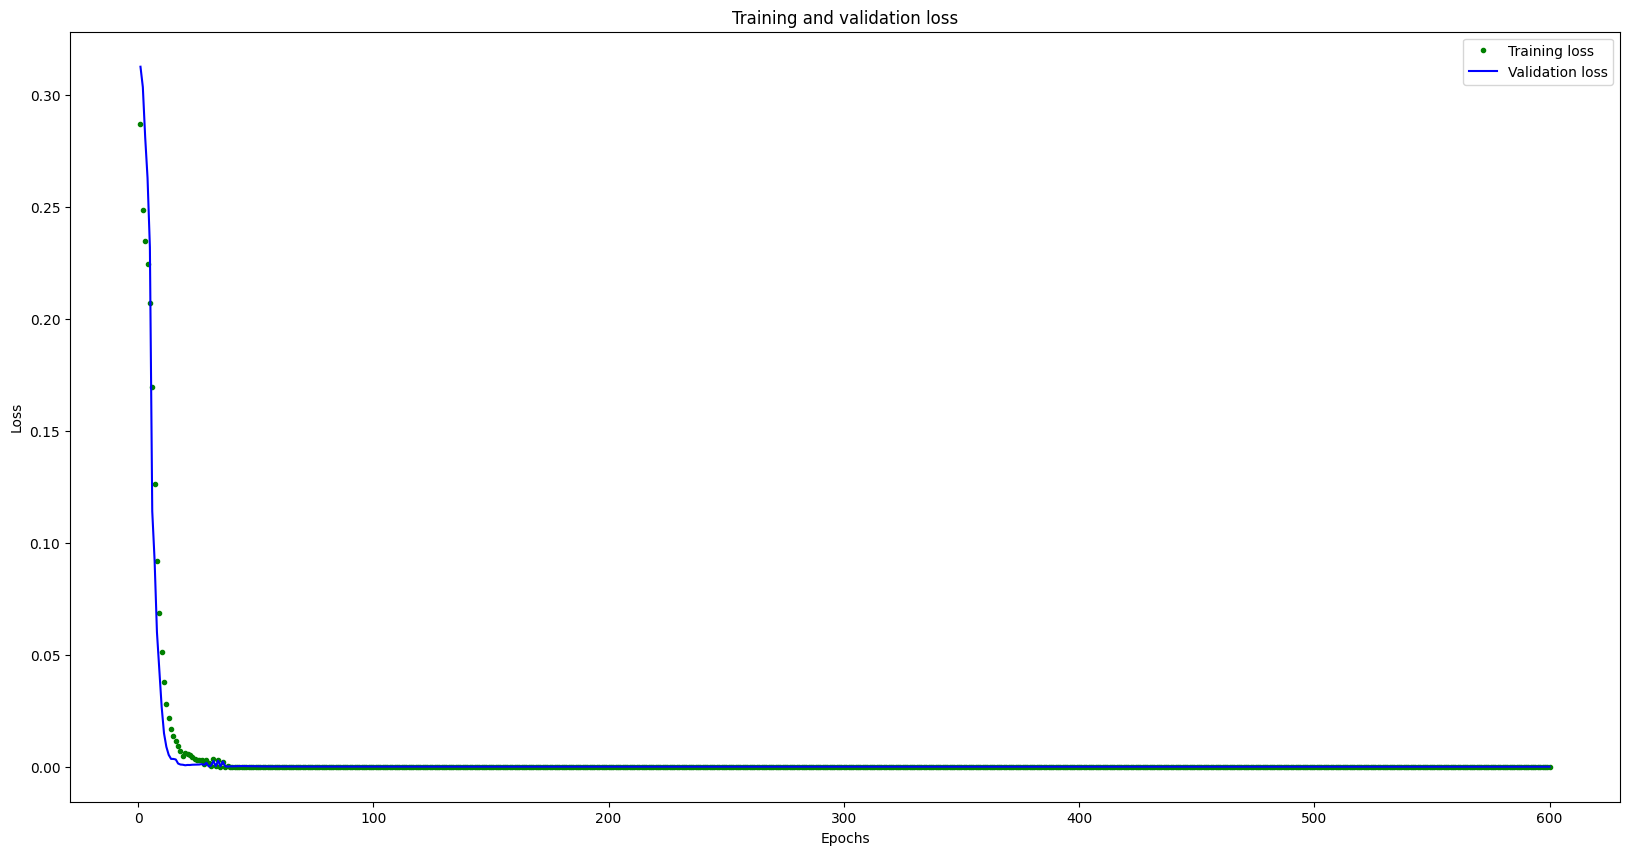

[20.0, 10.0]


In [16]:
# increase the size of the graphs. The default size is (6,4).
plt.rcParams["figure.figsize"] = (20,10)

# graph the loss, the model above is configure to use "mean squared error" as the loss function
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

print(plt.rcParams["figure.figsize"])

### Graph the loss again, skipping a bit of the start

We'll graph the same data as the previous code cell, but start at index 100 so we can further zoom in once the model starts to converge.

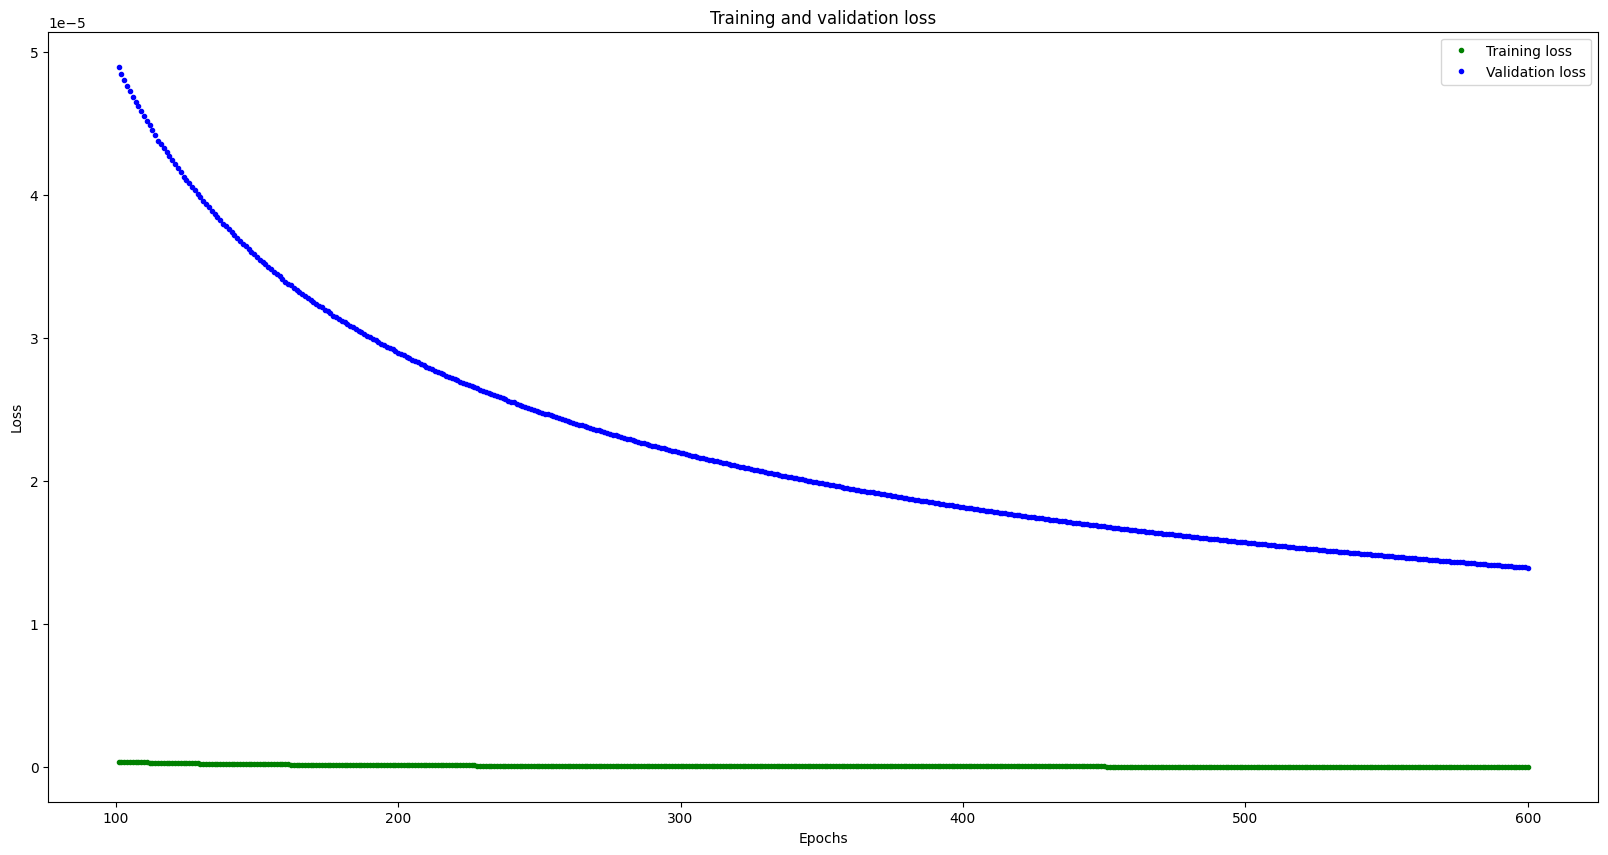

In [17]:
# graph the loss again skipping a bit of the start
SKIP = 100
plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Graph the mean absolute error

[Mean absolute error](https://en.wikipedia.org/wiki/Mean_absolute_error) is another metric to judge the performance of the model.



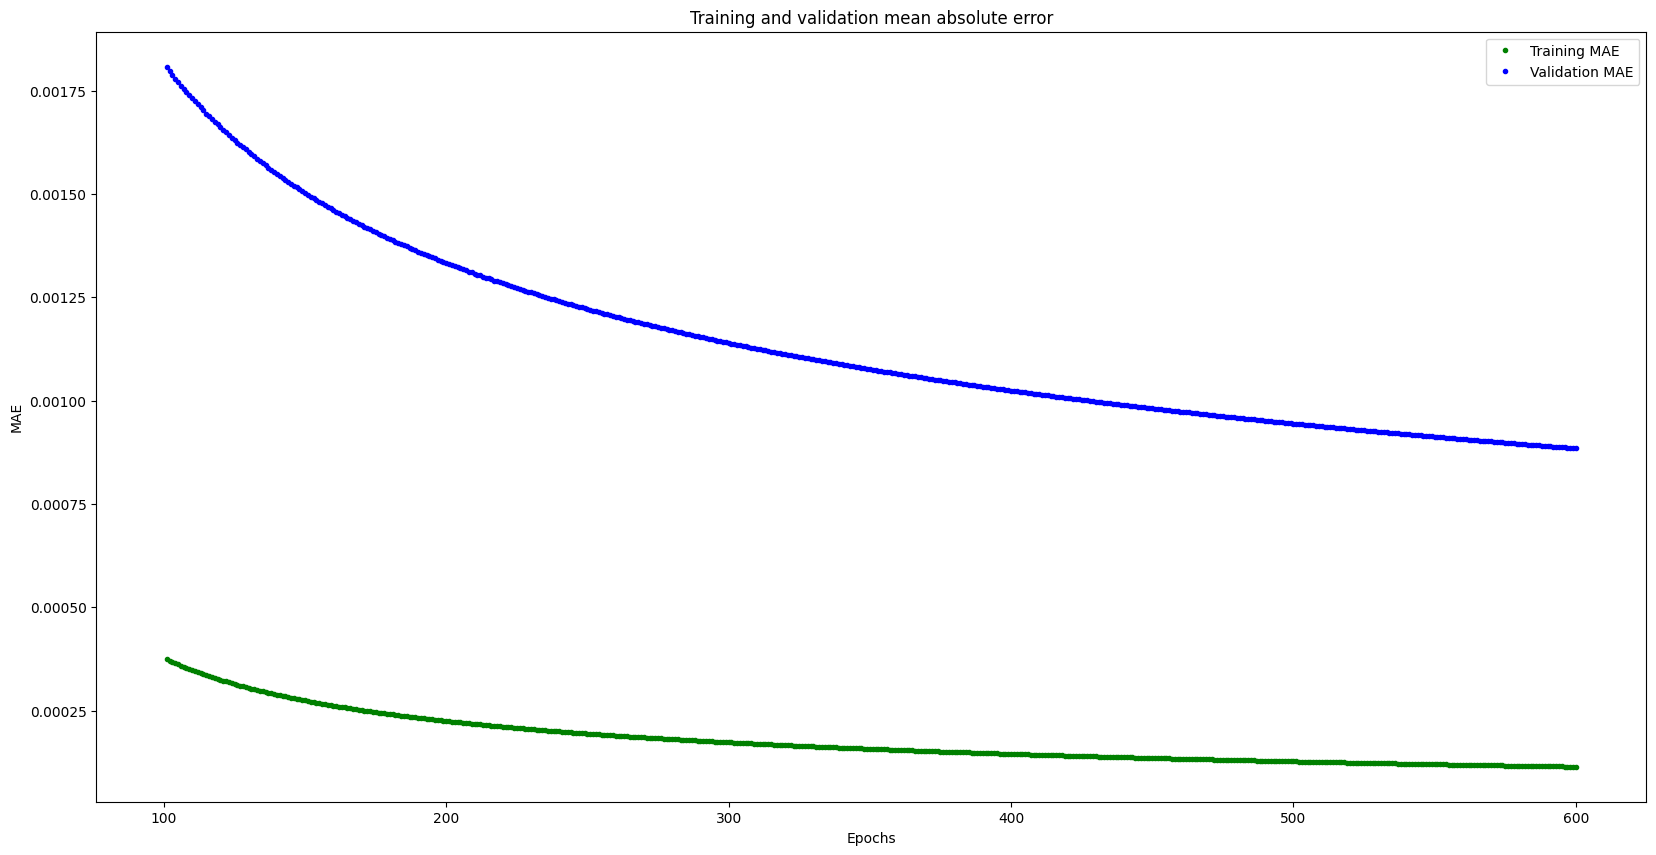

In [18]:
# graph of mean absolute error
mae = history.history['mae']
val_mae = history.history['val_mae']
plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()


### Run with Test Data
Put our test data into the model and plot the predictions


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
predictions =
 [[1.    0.   ]
 [0.008 0.992]
 [1.    0.   ]
 [1.    0.   ]
 [0.    1.   ]
 [1.    0.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.001 0.999]
 [0.    1.   ]
 [1.    0.   ]
 [1.    0.   ]
 [0.001 0.999]
 [0.982 0.018]
 [1.    0.   ]
 [0.    1.   ]
 [1.    0.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]]
actual =
 [[1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


ValueError: x has 714 columns but y has 2 columns

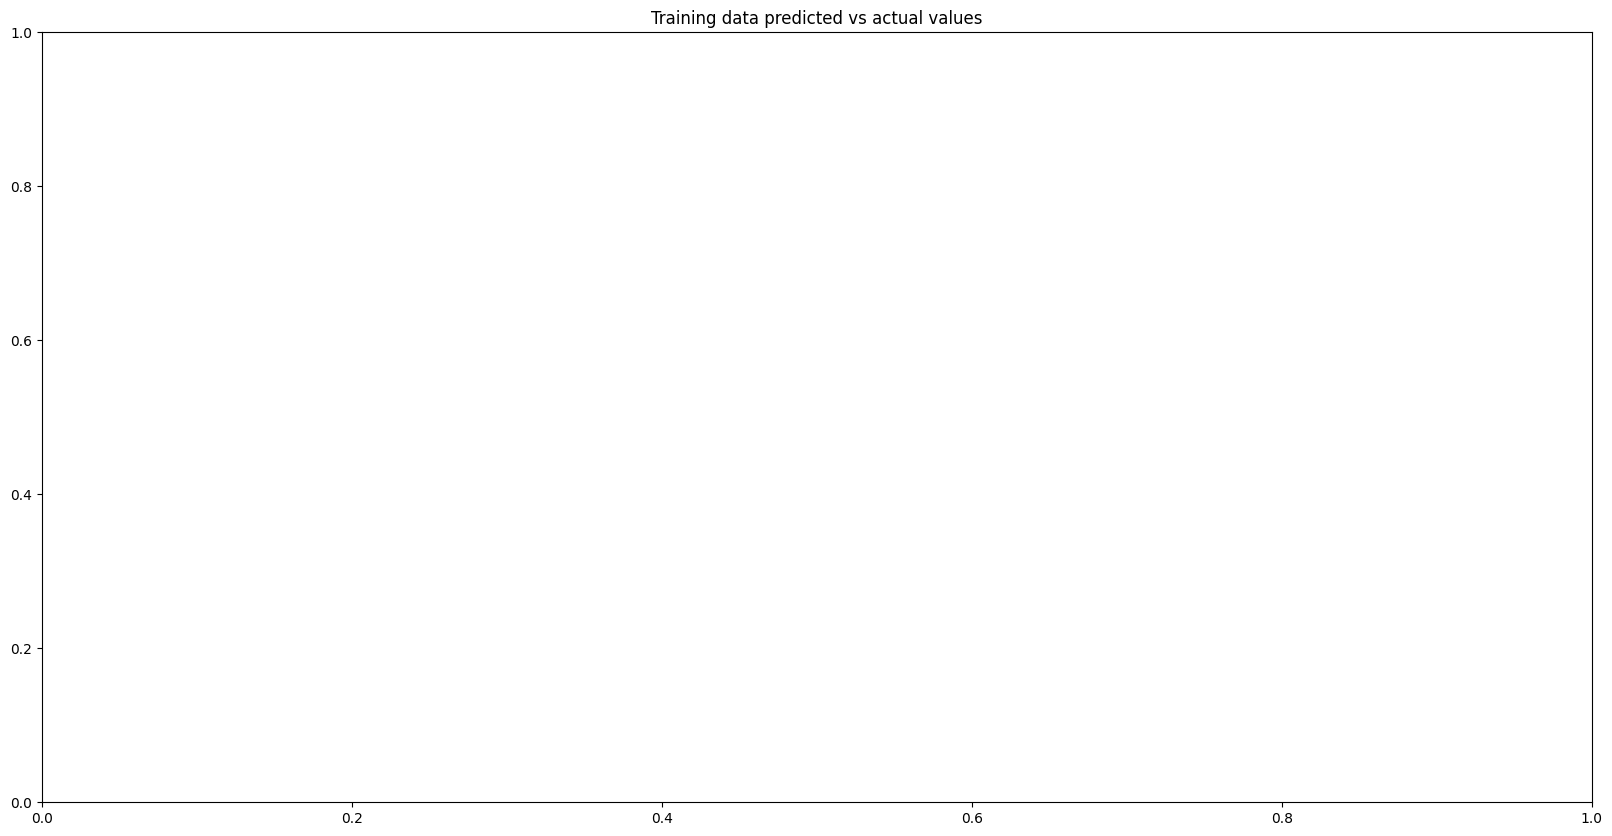

In [19]:
# use the model to predict the test inputs
predictions = model.predict(inputs_test)

# print the predictions and the expected ouputs
print("predictions =\n", np.round(predictions, decimals=3))
print("actual =\n", outputs_test)

# Plot the predictions along with to the test data
plt.clf()
plt.title('Training data predicted vs actual values')
plt.plot(inputs_test, outputs_test, 'b.', label='Actual')
plt.plot(inputs_test, predictions, 'r.', label='Predicted')
plt.show()

# Convert the Trained Model to Tensor Flow Lite

The next cell converts the model to TFlite format. The size in bytes of the model is also printed out.

In [20]:
# Convert the model to the TensorFlow Lite format without quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model to disk
open("gesture_model.tflite", "wb").write(tflite_model)

import os
basic_model_size = os.path.getsize("gesture_model.tflite")
print("Model is %d bytes" % basic_model_size)



INFO:tensorflow:Assets written to: /tmp/tmp6flacl_8/assets


INFO:tensorflow:Assets written to: /tmp/tmp6flacl_8/assets


Saved artifact at '/tmp/tmp6flacl_8'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(1, 714), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(1, 2), dtype=tf.float32, name=None)
Captures:
  140545519821296: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140545517099264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140545517107184: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140545517404224: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140545517093104: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140545517410912: TensorSpec(shape=(), dtype=tf.resource, name=None)
Model is 148168 bytes


W0000 00:00:1731169217.691154   22795 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1731169217.691169   22795 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
2024-11-09 21:50:17.691563: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmp6flacl_8
2024-11-09 21:50:17.691862: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2024-11-09 21:50:17.691869: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /tmp/tmp6flacl_8
I0000 00:00:1731169217.693773   22795 mlir_graph_optimization_pass.cc:401] MLIR V1 optimization pass is not enabled
2024-11-09 21:50:17.694126: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2024-11-09 21:50:17.709053: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /tmp/tmp6flacl_8
2024-11-09 21:50:17.712884: I tensorflow/cc/saved_model/loader.cc:466] SavedModel 

## Encode the Model in an Arduino Header File

The next cell creates a constant byte array that contains the TFlite model. Import it as a tab with the sketch below.

In [22]:
!echo "const unsigned char model[] = {" > model.h
!cat gesture_model.tflite | xxd -i      >> model.h
!echo "};"                              >> model.h

import os
model_h_size = os.path.getsize("model.h")
print(f"Header file, model.h, is {model_h_size:,} bytes.")
print("\Model Created")

Header file, model.h, is 913,738 bytes.
\Model Created


This code snippet is used to convert a TensorFlow Lite model (`gesture_model.tflite`) into a format that can be directly included in C/C++ source code, specifically as a header file (`model.h`). Here’s a breakdown of each line:

### Code Explanation

```bash
!echo "const unsigned char model[] = {" > /content/model.h
```
- This line starts by creating a new file called `model.h` in the `/content` directory.
- It adds the line `const unsigned char model[] = {` at the beginning of `model.h`.
- This line defines a `const unsigned char` array named `model` which will hold the binary data of the TensorFlow Lite model in C++-compatible format.

```bash
!cat gesture_model.tflite | xxd -i >> /content/model.h
```
- `cat gesture_model.tflite` outputs the raw contents of the TensorFlow Lite model file.
- `| xxd -i` pipes this output through `xxd`, a command-line utility that converts binary data into a hexadecimal C/C++ array format.
- `-i` (stands for "include") tells `xxd` to format the binary data as a `C` array initializer.
- This means each byte of the `.tflite` model file will be converted into a hexadecimal representation, and this representation will be appended (`>>`) to the `model.h` file.
- The result is a list of comma-separated hexadecimal values in the format `{ 0x.., 0x.., ... }` that can be directly used in C++ code.

```bash
!echo "};" >> /content/model.h
```
- This line appends `};` to the end of `model.h`, closing the `model` array declaration.

### Example of the Result (`model.h`)

The resulting `model.h` file would look something like this:

```cpp
const unsigned char model[] = {
  0x20, 0x03, 0x00, 0x00, // hexadecimal data representing the TensorFlow Lite model
  0x56, 0x00, 0x34, 0xab,
  // ... many more hex values ...
};
```

### Role of `xxd`

`xxd` is a Unix command-line tool that converts files between binary and hexadecimal formats. The `-i` option specifically formats binary data as a C-style array initializer, which is useful for embedding binary data, like a model file, directly into C or C++ source code.

### Purpose of This Conversion

The resulting `model.h` header file with the model data can then be included in an embedded system project (like an Arduino or ESP32 project) that doesn’t have a filesystem or native way to load external files. With this approach, the `.tflite` model is embedded directly in the code as an array, allowing the program to load and use the model directly from memory.

# Next Step 

Now its time to switch to the Next Phase of the tutorial which is to deploy the trained model to the Arduino